In [157]:
# import library and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [117]:
data_clean = pd.read_csv('Algerian_cleaned.csv')
data_clean.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,not fire
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,not fire
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,not fire
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,not fire
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,not fire


In [118]:
data_clean.shape

(243, 15)

In [119]:
data_clean.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [120]:
# convert fire and not fire into numeric value using one hot encoding
data_clean['Classes'] = np.where(data_clean.Classes.str.contains('not fire'),1,0)
data_clean['Classes']

0      1
1      1
2      1
3      1
4      1
      ..
238    0
239    1
240    1
241    1
242    1
Name: Classes, Length: 243, dtype: int32

In [121]:
data_clean.Classes.value_counts()

0    137
1    106
Name: Classes, dtype: int64

In [122]:
data_clean.drop(columns=['day', 'month', 'year'],axis=1,inplace=True)

In [123]:
data_clean.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Region', 'Classes'],
      dtype='object')

In [124]:
X = data_clean.drop('FWI',axis=1)
y = data_clean['FWI']

In [125]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region,Classes
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.0,1
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.0,1
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.0,1
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.0,1


In [126]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [127]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(170, 11)
(170,)
(73, 11)
(73,)


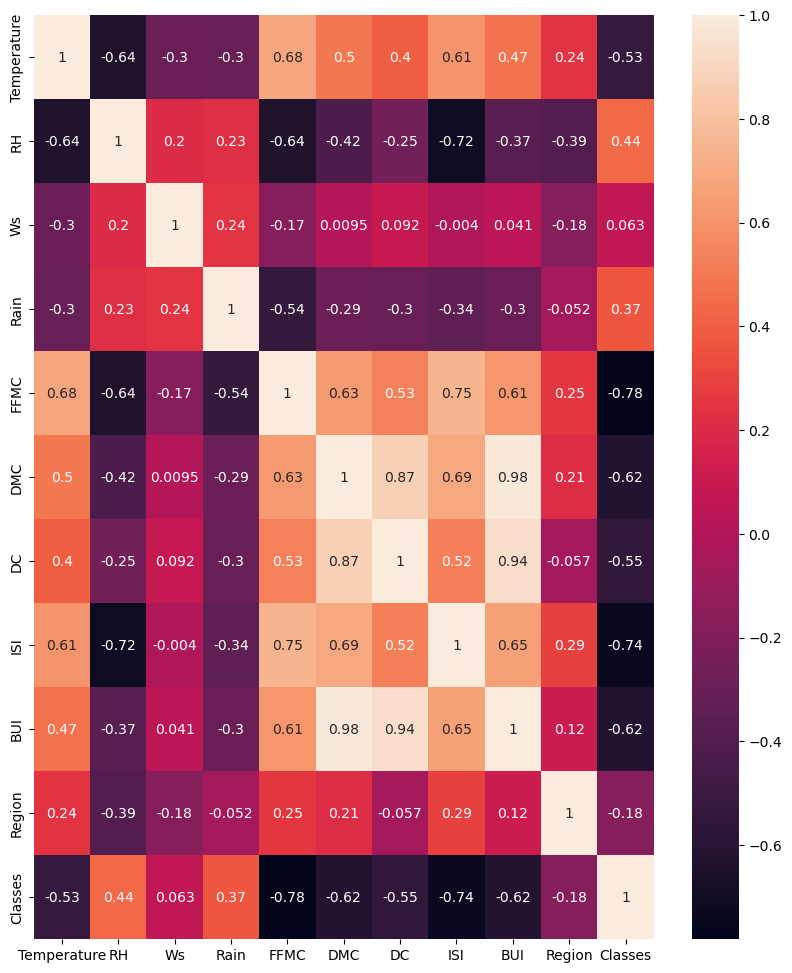

In [128]:
plt.figure(figsize=(10,12))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [129]:
def correlation_threshold(data,limit):
    col_highly_corelated = set()
    corelation_matrix = data.corr()
    for i in range(0,len(corelation_matrix.columns)):
        for j in range(i):
            if abs(corelation_matrix.iloc[i,j])>limit:
                col_highly_corelated.add(corelation_matrix.columns[i])
    
    return col_highly_corelated

In [130]:
corelated_features = correlation_threshold(X_train,0.80)
corelated_features

{'BUI', 'DC'}

In [131]:
X_train.drop(columns=corelated_features,axis=1,inplace=True)
X_test.drop(columns=corelated_features,axis=1,inplace=True)
print(X_train.shape)
print(X_test.shape)

(170, 9)
(73, 9)


In [133]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape

(170, 9)

In [134]:
X_test_scaled.shape

(73, 9)

In [135]:
X_train.shape

(170, 9)

In [136]:
X_test.shape

(73, 9)

In [137]:
y_train.shape

(170,)

In [138]:
y_test.shape

(73,)

C:\Users\milan\AppData\Local\Temp\ipykernel_7892\659587536.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


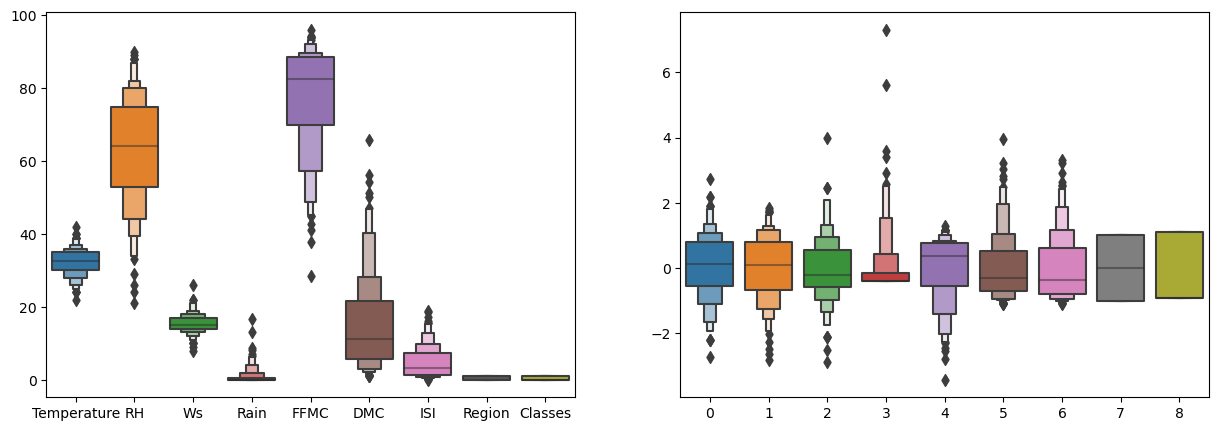

In [142]:
plt.subplots(figsize=(15, 5))
plt.subplot(1,2,1)
sns.boxenplot(data=X_train)
plt.subplot(1,2,2)
sns.boxenplot(data=X_train_scaled)
plt.show()

## Linear Regression

mean squared error train 1.8516065322594213
R2 score train 0.9679299933724282
-----------------------------
mean squared error test 0.6829306792403723
r2 score test 0.9839004057095255


C:\Users\milan\AppData\Local\Temp\ipykernel_7892\1589440773.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


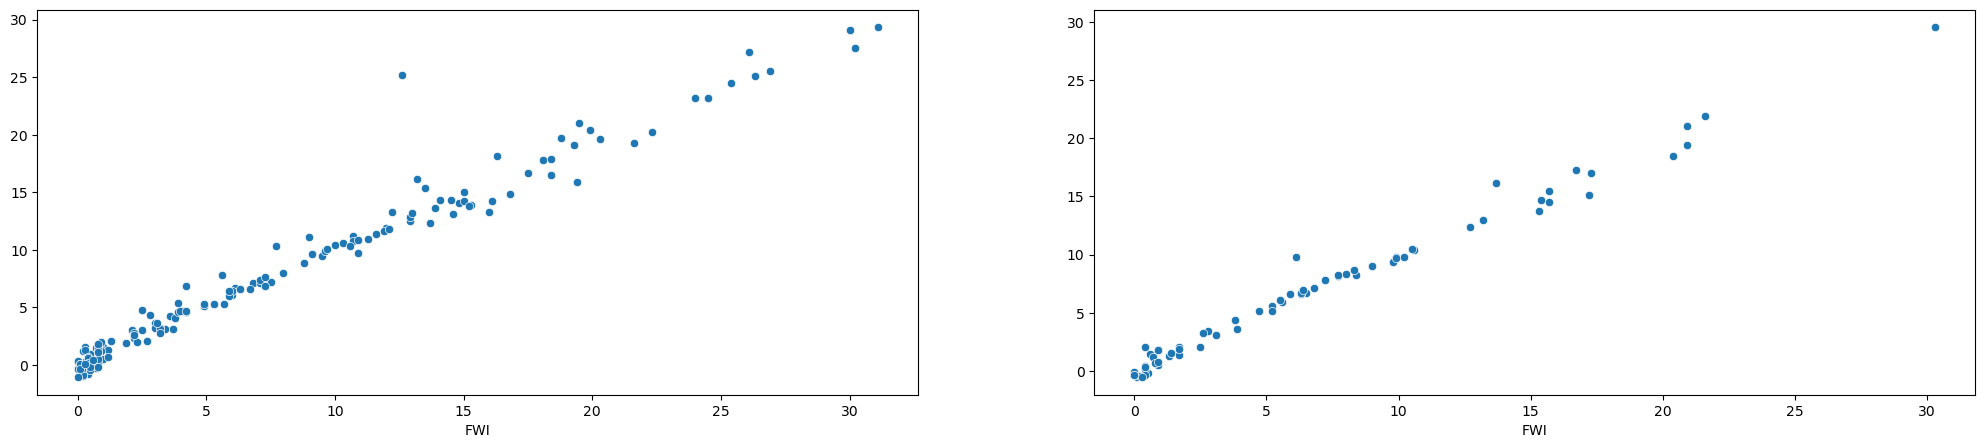

In [151]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linear_model = LinearRegression()
linear_model.fit(X_train_scaled,y_train)
y_pred_train = linear_model.predict(X_train_scaled)
y_pred_test = linear_model.predict(X_test_scaled)

mae_train = mean_squared_error(y_pred_train,y_train)
r2_train = r2_score(y_pred_train,y_train)

mae_test = mean_squared_error(y_pred_test,y_test)
r2_test = r2_score(y_pred_test,y_test)

print('mean squared error train',mae_train)
print('R2 score train',r2_train)
print('-----------------------------')
print('mean squared error test',mae_test)
print('r2 score test',r2_test)

plt.subplots(figsize=(25,5))
plt.subplot(1,2,1)
sns.scatterplot(x=y_train,y=y_pred_train)
plt.subplot(1,2,2)
sns.scatterplot(x=y_test,y=y_pred_test)
plt.show()

## Plotting the residual for train and test data

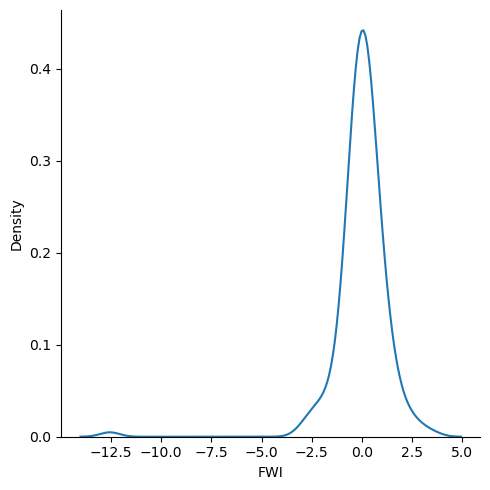

In [186]:
train_residual = y_train-y_pred_train
test_residual = y_test-y_pred_test
sns.displot(ax=axes[0],x=train_residual,kind='kde')
plt.show()

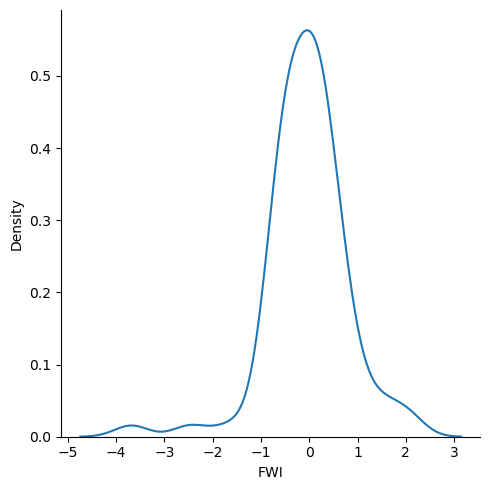

In [187]:
sns.displot(ax=axes[1],x=test_residual,kind='kde')
plt.show()

## Lasso

Mean absolute error for Lasso for training data 1.864562638229941
R2 score for training data 0.96870909197485
---------------------
Mean absolute error for Lasso for test data 0.7012013390483559
R2 score for test data 0.9843119151889623


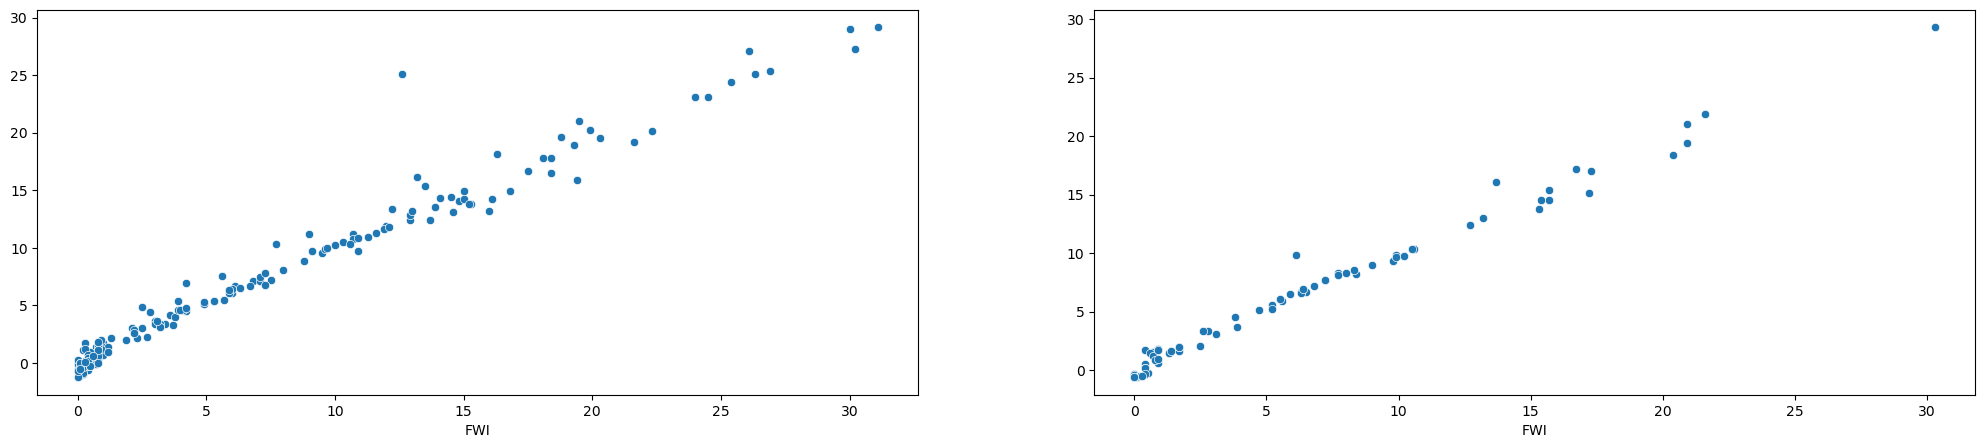

In [159]:
from sklearn.linear_model import LassoCV

lasso_model = LassoCV(cv=7)
lasso_model.fit(X_train_scaled,y_train)

y_pred_train_lasso = lasso_model.predict(X_train_scaled)
y_pred_test_lasso  = lasso_model.predict(X_test_scaled)

lasso_mae_train = mean_squared_error(y_train,y_pred_train_lasso)
lasso_mae_test = mean_squared_error(y_test,y_pred_test_lasso)

lasso_r2_train = r2_score(y_train,y_pred_train_lasso)
lasso_r2_test = r2_score(y_test,y_pred_test_lasso)

print('Mean absolute error for Lasso for training data',lasso_mae_train)
print('R2 score for training data',lasso_r2_train)
print(('---------------------'))
print('Mean absolute error for Lasso for test data',lasso_mae_test)
print('R2 score for test data',lasso_r2_test)


plt.subplots(figsize=(25,5))
plt.subplot(1,2,1)
sns.scatterplot(x=y_train,y=y_pred_train_lasso)
plt.subplot(1,2,2)
sns.scatterplot(x=y_test,y=y_pred_test_lasso)
plt.show()

In [188]:
train_residual_lasso = y_train-y_pred_train_lasso
test_residual_lasso = y_test-y_pred_test_lasso

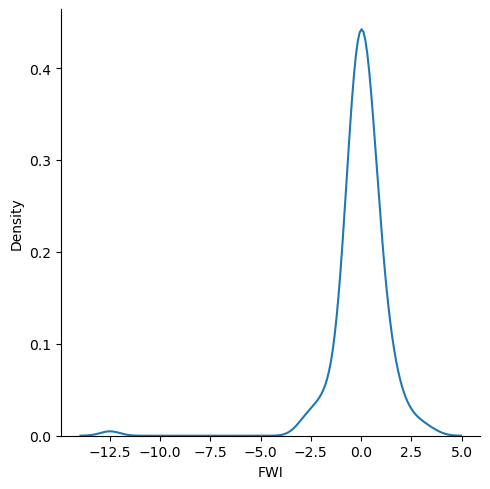

In [189]:
sns.displot(train_residual_lasso,kind='kde')
plt.show()

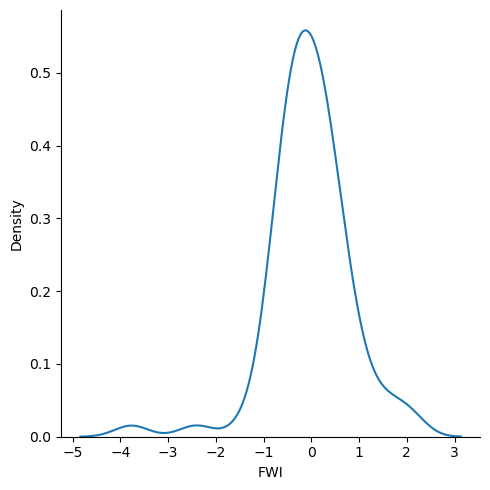

In [190]:
sns.displot(test_residual_lasso,kind='kde')
plt.show()

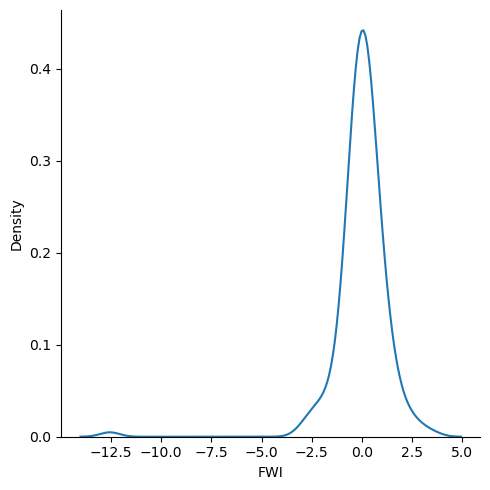

In [167]:
train_residual
sns.displot(train_residual,kind='kde')

## Ridge

MAE ridge train 1.8547619879744215
R2 score train 0.9688735655299049
--------------------------
MAE ridge test 0.7079451074397777
R2 score test 0.9841610358272455


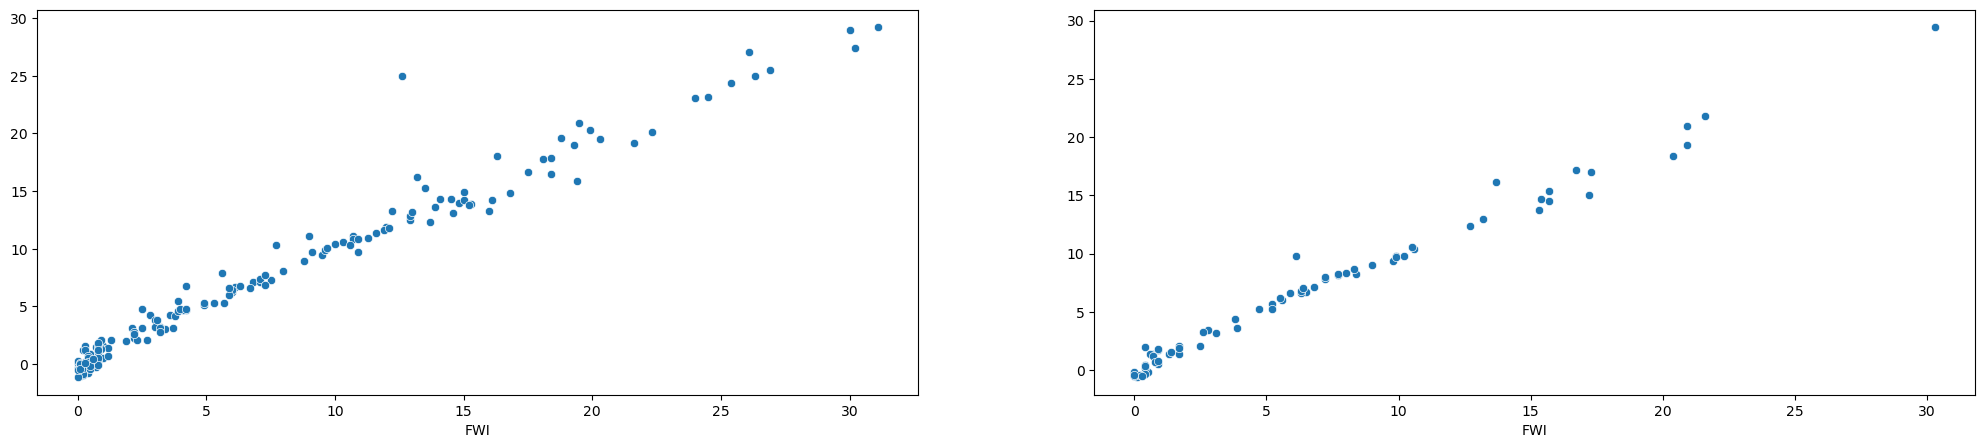

In [191]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train_scaled,y_train)

y_pred_train_ridge = ridge_model.predict(X_train_scaled)
y_pred_test_ridge = ridge_model.predict(X_test_scaled)

mae_train_ridge = mean_squared_error(y_train,y_pred_train_ridge)
mae_test_ridge = mean_squared_error(y_test,y_pred_test_ridge)

r2_train_ridge = r2_score(y_train,y_pred_train_ridge)
r2_test_ridge = r2_score(y_test,y_pred_test_ridge)

residual_train = y_train-y_pred_train_ridge
residual_test = y_test-y_pred_test_ridge
print('MAE ridge train',mae_train_ridge)
print('R2 score train',r2_train_ridge)
print('--------------------------')
print('MAE ridge test',mae_test_ridge)
print('R2 score test',r2_test_ridge)

plt.subplots(figsize=(25,5))
plt.subplot(1,2,1)
sns.scatterplot(x=y_train,y=y_pred_train_ridge)
plt.subplot(1,2,2)
sns.scatterplot(x=y_test,y=y_pred_test_ridge)
plt.show()

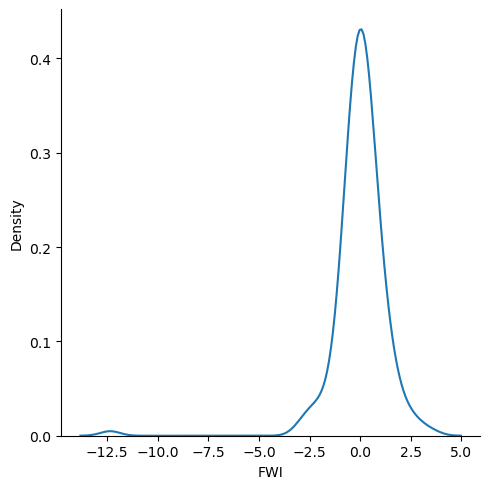

In [192]:
sns.displot(residual_train,kind='kde')
plt.show()

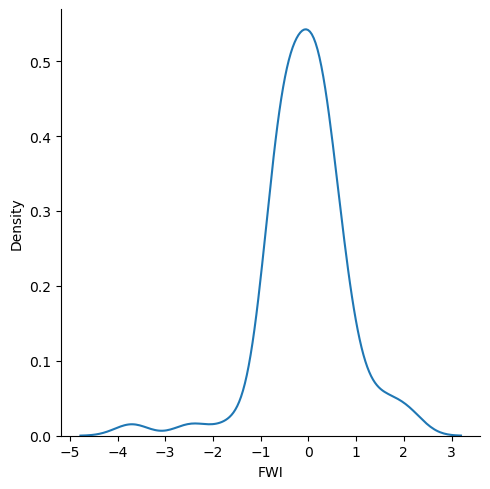

In [193]:
sns.displot(residual_test,kind='kde')
plt.show()